# The OM10 Quad Fraction

Ongoing lens searches are not finding as many quads as we might hope for. Are the search methods systematically missing quads somehow, or are the OM10 forecasts off?

Let's make some mock samples for a few current searches, and revisit the predictions for lens abundance and the quad fraction. The two main potential sources of systematic error in the forecasts are 1) the distribution of external shears and 2) the quasar luminosity function. Let's look at the distributions of shear and source magnitude and redshift across our mock samples, and look for possible problems.

In [4]:
%matplotlib inline
from __future__ import division
import om10,os
import numpy as np
import matplotlib.pyplot as plt
import corner

In [67]:
# SQLS-like sample, but 10 times the area:
db = om10.DB(catalog='$OM10_DIR/data/qso_mock.fits')
db.select_random(maglim=18.0,area=100000.0,IQ=1.4)

quads = db.sample[db.sample['NIMG'] == 4]
doubles = db.sample[db.sample['NIMG'] == 2]

print 'Predicted number of quads, doubles: ', 0.01*len(quads),',',0.01*len(doubles)
print 'Predicted quad fraction: ', str(int(100.0*len(quads)/(1.0*len(doubles))))+'%'

print "Compare with 4 quads, 19 doubles." 

om10.DB: selection yields  36  lenses
Predicted number of quads, doubles:  0.15 , 0.21
Predicted quad fraction:  71%
Compare with 4 quads, 19 doubles.


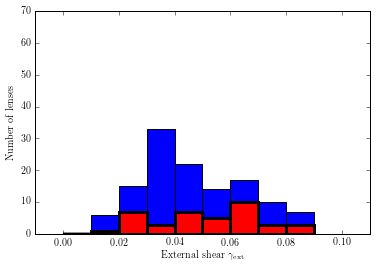

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(doubles['GAMMA'].flatten(), bins=np.arange(0, 0.1, 0.01), alpha=1.0, lw=1, fc='blue')
ax.hist(quads['GAMMA'].flatten(), bins=np.arange(0, 0.1, 0.01), alpha=1.0, lw=3, fc='red')
ax.set_xlim(-0.01, 0.11)
ax.set_ylim(0,70)
plt.xlabel('External shear $\gamma_{\\rm ext}$')
plt.ylabel('Number of lenses')

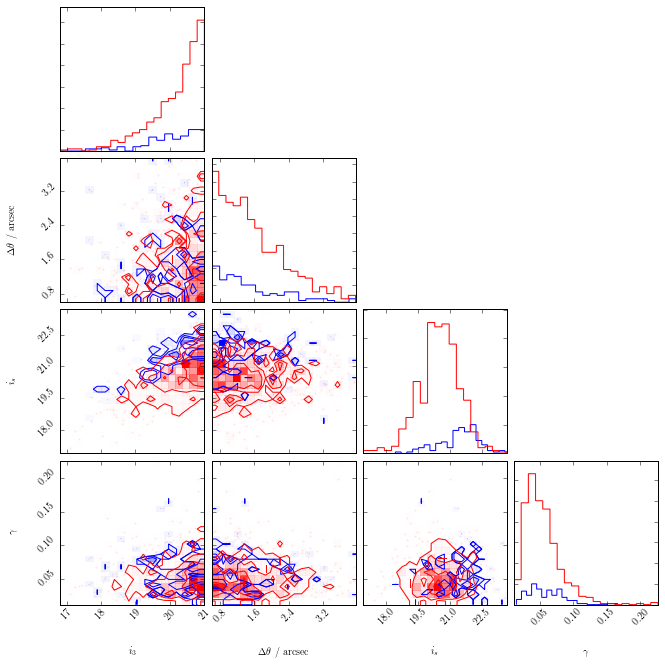

In [61]:
def extract_features(db):
    features = np.array([db['MAGI'],db['IMSEP'],db['MAGI_IN'],db['GAMMA']]).transpose()
    labels = ['$i_3$','$\Delta \\theta$ / arcsec','$i_s$','$\gamma$']
    return features, labels

d,labels = extract_features(doubles)
q,labels = extract_features(quads)

fig = corner.corner(q,labels=labels,color='blue')
_ = corner.corner(d,labels=labels,color='red',fig=fig)